In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
index_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Image Detection\index_image_to_landmark.csv")
landmark_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Image Detection\Landmark_ids.csv")

In [3]:
id_list = landmark_df['ID'].tolist()   # Getting a list of ID's that we will look for
print(id_list)

[40333, 22377, 43267, 10293, 30675, 85053, 73248, 83439, 29568, 58504, 85575, 48268, 10924, 43412, 77972, 44418, 14790, 47616, 80307, 82091, 39351, 38652, 28791, 15411, 64537, 91294, 70087, 72649, 3831, 77887, 12687, 65436, 108502, 55964]


In [4]:
filtered_df = index_df.loc[index_df['landmark_id'].isin(id_list)]   # Taking only images that we are interested in
filtered_df['landmark_id'].unique()    # There are some values in id_list that aren't here. 

array([29568, 47616, 10293, 70087, 12687, 15411, 43412, 28791, 39351,
        3831, 38652, 55964, 64537, 72649, 65436, 80307, 58504, 30675,
       22377, 85053, 40333, 48268, 44418, 14790, 82091, 83439, 10924,
       91294, 85575, 77972, 73248, 77887, 43267], dtype=int64)

In [5]:
print(len(filtered_df))    # We have 909 values to train our model.

5029


In [6]:
merged_df = filtered_df.merge(landmark_df, left_on='landmark_id', right_on='ID', how='left')   # Finalizing the dataframe
merged_df = merged_df.drop(columns=['ID'])
merged_df.head()

,id,landmark_id,Landmark
0,0af7c889a0adb459,29568,Allegheny Cemetery Pittsburgh
1,1b899ce36aed7d0b,47616,Fairmount Water Works
2,4ccecfade7dd6506,10293,Eldorado National Forest
3,576a734d9c97c07b,70087,Horseshoe Falls
4,27d5ac4b88875c7c,12687,Mount Rainier


<Axes: title={'center': 'Counts of each Landmark'}, xlabel='Landmark', ylabel='Count'>

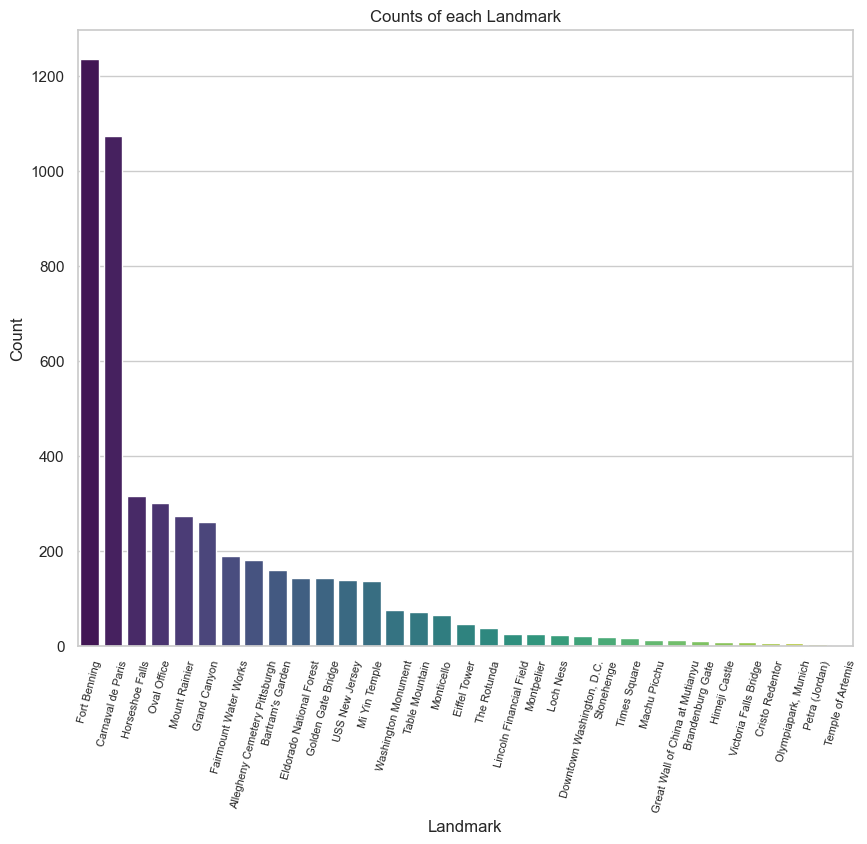

In [7]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="whitegrid")
plt.xticks(fontsize = 8, rotation=75)
plt.title("Counts of each Landmark")
landmark_counts = merged_df['Landmark'].value_counts().reset_index()
landmark_counts.columns = ['Landmark', 'Count']

sns.barplot(x='Landmark', y='Count', data=landmark_counts, palette='viridis')